<a href="https://colab.research.google.com/github/Viny2030/UMSA-Analisis_de_datos/blob/main/eda_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

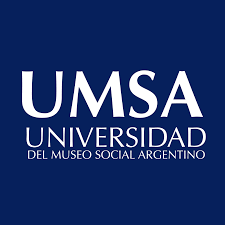

## **Análisis Exploratorio de los Datos**

**En este cuaderno colab se realizaran algunas tareas de preprocesamiento de los datos...**

## **Actualizando los módulos necesarios**

In [1]:
!pip install scikit-learn --upgrade

## **Carga de módulos**

### **Para análisis de los datos**

In [2]:
import pandas as pd
import numpy as np

### **Para preprocesamiento de los datos**

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

## **Carga de Datos**

In [63]:
url = "https://raw.githubusercontent.com/Viny2030/UMSA-Analisis_de_datos/refs/heads/main/visualizacion.csv"

In [64]:
analisis = pd.read_csv(url)
analisis.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Se cambian los nombres de las columnas para mejor interpretacion...**

In [65]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [66]:
analisis.rename(columns={"satisfaction_level":"niveldesatisfaccion",
                         "last_evaluation":"ultimaevaluacion",
                         "number_project":"numerosdeproyectos",
                         "average_montly_hours":"horasmensualespromedio",
                         "time_spend_company":"tiempoenlaempresa",
                         "Work_accident":"accidentedetrabajo",
                         "left":"abandono",
                         "promotion_last_5years":"promocionultimos5años",
                         "sales":"ventas",
                         "salary":"sueldo"}, inplace= True)

In [67]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   niveldesatisfaccion     14999 non-null  float64
 1   ultimaevaluacion        14999 non-null  float64
 2   numerosdeproyectos      14999 non-null  int64  
 3   horasmensualespromedio  14999 non-null  int64  
 4   tiempoenlaempresa       14999 non-null  int64  
 5   accidentedetrabajo      14999 non-null  int64  
 6   abandono                14999 non-null  int64  
 7   promocionultimos5años   14999 non-null  int64  
 8   ventas                  14999 non-null  object 
 9   sueldo                  14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# **Limpieza y transformación de los datos**

## **Filtrado de datos**

In [68]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   niveldesatisfaccion     14999 non-null  float64
 1   ultimaevaluacion        14999 non-null  float64
 2   numerosdeproyectos      14999 non-null  int64  
 3   horasmensualespromedio  14999 non-null  int64  
 4   tiempoenlaempresa       14999 non-null  int64  
 5   accidentedetrabajo      14999 non-null  int64  
 6   abandono                14999 non-null  int64  
 7   promocionultimos5años   14999 non-null  int64  
 8   ventas                  14999 non-null  object 
 9   sueldo                  14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [69]:
analisis.head(2)

,niveldesatisfaccion,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio,tiempoenlaempresa,accidentedetrabajo,abandono,promocionultimos5años,ventas,sueldo
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [12]:
analisis.rename(columns={"ventas":"sector"}, inplace=True)

In [13]:
analisis.filter(["sector", "sueldo"])

,sector,sueldo
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [14]:
analisis.sueldo

,sueldo
0,low
1,medium
2,medium
3,low
4,low
...,...
14994,low
14995,low
14996,low
14997,low


In [15]:
analisis.filter([0,1,2,5,7,19],axis=0)

,niveldesatisfaccion,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio,tiempoenlaempresa,accidentedetrabajo,abandono,promocionultimos5años,sector,sueldo
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
5,0.41,0.50,2,153,3,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
19,0.76,0.89,5,262,5,0,1,0,sales,low


In [16]:
analisis[analisis.sector=="support"]

,niveldesatisfaccion,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio,tiempoenlaempresa,accidentedetrabajo,abandono,promocionultimos5años,sector,sueldo
46,0.40,0.55,2,147,3,0,1,0,support,low
47,0.57,0.70,3,273,6,0,1,0,support,low
48,0.40,0.54,2,148,3,0,1,0,support,low
49,0.43,0.47,2,147,3,0,1,0,support,low
50,0.13,0.78,6,152,2,0,1,0,support,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## **Valores faltantes**

In [79]:
url2 = "https://raw.githubusercontent.com/Viny2030/UMSA-Analisis_de_datos/refs/heads/main/empleados.csv"

In [80]:
empleados = pd.read_csv(url2)

In [81]:
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre
0,Alan Smith,45.0,NaN,NaN,Operations,G3,723,Alan,Smith
1,Sandro Kumar,NaN,16000.0,F,Finance,G0,520,Sandro,Kumar
2,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan
3,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin
4,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel
5,Samara Sharma,NaN,62000.0,NaN,Sales,G3,649,Samara,Sharma
6,Joaquin Fleiman,54.0,NaN,F,Operations,G3,53,Joaquin,Fleiman
7,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis
8,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti


### **Eliminando los NaN**

In [82]:
empleados.dropna(how="any", inplace=True)

In [83]:
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre
2,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan
3,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin
4,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel
7,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis
8,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti


### **Completando los NaN**

In [84]:
empleados = pd.read_csv(url2)
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre
0,Alan Smith,45.0,NaN,NaN,Operations,G3,723,Alan,Smith
1,Sandro Kumar,NaN,16000.0,F,Finance,G0,520,Sandro,Kumar
2,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan
3,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin
4,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel
5,Samara Sharma,NaN,62000.0,NaN,Sales,G3,649,Samara,Sharma
6,Joaquin Fleiman,54.0,NaN,F,Operations,G3,53,Joaquin,Fleiman
7,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis
8,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti


In [85]:
empleados["edad"] = empleados.edad.fillna(empleados.edad.mean())
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre
0,Alan Smith,45.000000,NaN,NaN,Operations,G3,723,Alan,Smith
1,Sandro Kumar,40.428571,16000.0,F,Finance,G0,520,Sandro,Kumar
2,Jacinto Morgan,32.000000,35000.0,M,Finance,G2,674,Jacinto,Morgan
3,Ernesto Chin,45.000000,65000.0,F,Sales,G3,556,Ernesto,Chin
4,Fernanda Patel,30.000000,42000.0,F,Operations,G2,711,Fernanda,Patel
5,Samara Sharma,40.428571,62000.0,NaN,Sales,G3,649,Samara,Sharma
6,Joaquin Fleiman,54.000000,NaN,F,Operations,G3,53,Joaquin,Fleiman
7,Juana Wilkis,54.000000,52000.0,F,Finance,G3,901,Juana,Wilkis
8,Leonardo Doberti,23.000000,98000.0,M,Sales,G4,709,Leonardo,Doberti


In [86]:
empleados = pd.read_csv(url2)
empleados["edad"] = round(empleados.edad.fillna(empleados.edad.mean()),0)
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre
0,Alan Smith,45.0,NaN,NaN,Operations,G3,723,Alan,Smith
1,Sandro Kumar,40.0,16000.0,F,Finance,G0,520,Sandro,Kumar
2,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan
3,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin
4,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel
5,Samara Sharma,40.0,62000.0,NaN,Sales,G3,649,Samara,Sharma
6,Joaquin Fleiman,54.0,NaN,F,Operations,G3,53,Joaquin,Fleiman
7,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis
8,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti


In [87]:
empleados = pd.read_csv(url2)
empleados["edad"] = empleados.edad.fillna(empleados.edad.median())
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre
0,Alan Smith,45.0,NaN,NaN,Operations,G3,723,Alan,Smith
1,Sandro Kumar,45.0,16000.0,F,Finance,G0,520,Sandro,Kumar
2,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan
3,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin
4,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel
5,Samara Sharma,45.0,62000.0,NaN,Sales,G3,649,Samara,Sharma
6,Joaquin Fleiman,54.0,NaN,F,Operations,G3,53,Joaquin,Fleiman
7,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis
8,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti


In [88]:
empleados["sueldo"] = empleados.sueldo.fillna(empleados.sueldo.median())
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre
0,Alan Smith,45.0,52000.0,NaN,Operations,G3,723,Alan,Smith
1,Sandro Kumar,45.0,16000.0,F,Finance,G0,520,Sandro,Kumar
2,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan
3,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin
4,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel
5,Samara Sharma,45.0,62000.0,NaN,Sales,G3,649,Samara,Sharma
6,Joaquin Fleiman,54.0,52000.0,F,Operations,G3,53,Joaquin,Fleiman
7,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis
8,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti


## **Codificación**

In [89]:
empleados = pd.read_csv(url2)
empleados.dropna(how="any", inplace=True)
empleados.reset_index(drop=True, inplace=True)
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre
0,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan
1,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin
2,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel
3,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis
4,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti


In [90]:
empleadoscodificados = pd.get_dummies(empleados["sexo"])

In [91]:
empleadoscodificados

,F,M
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [92]:
empleados = empleados.join(empleadoscodificados)

In [93]:
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre,F,M
0,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan,False,True
1,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin,True,False
2,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel,True,False
3,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis,True,False
4,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti,False,True


**O todo en una sola linea... primero cargamos el dataframe**

In [94]:
empleados = pd.read_csv(url2)
empleados.dropna(how="any", inplace=True)
empleados.reset_index(drop=True, inplace=True)
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre
0,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan
1,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin
2,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel
3,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis
4,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti


**Ahora si, una linea**

In [95]:
empleados = empleados.join(pd.get_dummies(empleados["sexo"]))

In [96]:
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre,F,M
0,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan,False,True
1,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin,True,False
2,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel,True,False
3,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis,True,False
4,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti,False,True


In [97]:
empleados = pd.read_csv(url2)
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre
0,Alan Smith,45.0,NaN,NaN,Operations,G3,723,Alan,Smith
1,Sandro Kumar,NaN,16000.0,F,Finance,G0,520,Sandro,Kumar
2,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan
3,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin
4,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel
5,Samara Sharma,NaN,62000.0,NaN,Sales,G3,649,Samara,Sharma
6,Joaquin Fleiman,54.0,NaN,F,Operations,G3,53,Joaquin,Fleiman
7,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis
8,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti


In [98]:
etiqueta_ordenada = LabelEncoder()

In [99]:
empleados["nivel_cod"] = etiqueta_ordenada.fit_transform(empleados["nivel"])

In [100]:
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre,nivel_cod
0,Alan Smith,45.0,NaN,NaN,Operations,G3,723,Alan,Smith,2
1,Sandro Kumar,NaN,16000.0,F,Finance,G0,520,Sandro,Kumar,0
2,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan,1
3,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin,2
4,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel,1
5,Samara Sharma,NaN,62000.0,NaN,Sales,G3,649,Samara,Sharma,2
6,Joaquin Fleiman,54.0,NaN,F,Operations,G3,53,Joaquin,Fleiman,2
7,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis,2
8,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti,3


## **Escalas de las características de los datos**

In [101]:
escala = StandardScaler()

In [102]:
escala.fit(empleados["performance"].values.reshape(-1,1))

StandardScaler()

In [103]:
empleados["escala_perform"]=escala.transform(empleados["performance"].values.reshape(-1,1))

In [104]:
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre,nivel_cod,escala_perform
0,Alan Smith,45.0,NaN,NaN,Operations,G3,723,Alan,Smith,2,0.505565
1,Sandro Kumar,NaN,16000.0,F,Finance,G0,520,Sandro,Kumar,0,-0.408053
2,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan,1,0.285037
3,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin,2,-0.246032
4,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel,1,0.451558
5,Samara Sharma,NaN,62000.0,NaN,Sales,G3,649,Samara,Sharma,2,0.172522
6,Joaquin Fleiman,54.0,NaN,F,Operations,G3,53,Joaquin,Fleiman,2,-2.509823
7,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis,2,1.306668
8,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti,3,0.442557


In [105]:
escalaminmax = MinMaxScaler()

In [106]:
escalaminmax.fit(empleados["performance"].values.reshape(-1,1))

MinMaxScaler()

In [107]:
empleados["escala_minmax"]=escalaminmax.transform(empleados["performance"].values.reshape(-1,1))

In [108]:
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre,nivel_cod,escala_perform,escala_minmax
0,Alan Smith,45.0,NaN,NaN,Operations,G3,723,Alan,Smith,2,0.505565,0.790094
1,Sandro Kumar,NaN,16000.0,F,Finance,G0,520,Sandro,Kumar,0,-0.408053,0.550708
2,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan,1,0.285037,0.732311
3,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin,2,-0.246032,0.593160
4,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel,1,0.451558,0.775943
5,Samara Sharma,NaN,62000.0,NaN,Sales,G3,649,Samara,Sharma,2,0.172522,0.702830
6,Joaquin Fleiman,54.0,NaN,F,Operations,G3,53,Joaquin,Fleiman,2,-2.509823,0.000000
7,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis,2,1.306668,1.000000
8,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti,3,0.442557,0.773585


In [109]:
escala_robusta = RobustScaler()

In [110]:
escala_robusta.fit(empleados["performance"].values.reshape(-1,1))

RobustScaler()

In [111]:
empleados["escala_robusta"]=escala_robusta.transform(empleados["performance"].values.reshape(-1,1))

In [112]:
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre,nivel_cod,escala_perform,escala_minmax,escala_robusta
0,Alan Smith,45.0,NaN,NaN,Operations,G3,723,Alan,Smith,2,0.505565,0.790094,0.316129
1,Sandro Kumar,NaN,16000.0,F,Finance,G0,520,Sandro,Kumar,0,-0.408053,0.550708,-0.993548
2,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan,1,0.285037,0.732311,0.000000
3,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin,2,-0.246032,0.593160,-0.761290
4,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel,1,0.451558,0.775943,0.238710
5,Samara Sharma,NaN,62000.0,NaN,Sales,G3,649,Samara,Sharma,2,0.172522,0.702830,-0.161290
6,Joaquin Fleiman,54.0,NaN,F,Operations,G3,53,Joaquin,Fleiman,2,-2.509823,0.000000,-4.006452
7,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis,2,1.306668,1.000000,1.464516
8,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti,3,0.442557,0.773585,0.225806


## **Transformación de las características de los datos**

In [113]:
empleados = pd.read_csv(url2)

In [114]:
def grado_performance(performance):
    if performance >= 700:
        return "A"
    elif performance < 700 and performance >= 500:
        return "B"
    else:
        return "C"

In [115]:
empleados["grado_performance"] = empleados.performance.apply(grado_performance)

In [116]:
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre,grado_performance
0,Alan Smith,45.0,NaN,NaN,Operations,G3,723,Alan,Smith,A
1,Sandro Kumar,NaN,16000.0,F,Finance,G0,520,Sandro,Kumar,B
2,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan,B
3,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin,B
4,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel,A
5,Samara Sharma,NaN,62000.0,NaN,Sales,G3,649,Samara,Sharma,B
6,Joaquin Fleiman,54.0,NaN,F,Operations,G3,53,Joaquin,Fleiman,C
7,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis,A
8,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti,A


In [117]:
empleados = pd.read_csv(url2)

In [118]:
empleados.performance = empleados.performance.apply(grado_performance)

In [119]:
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre
0,Alan Smith,45.0,NaN,NaN,Operations,G3,A,Alan,Smith
1,Sandro Kumar,NaN,16000.0,F,Finance,G0,B,Sandro,Kumar
2,Jacinto Morgan,32.0,35000.0,M,Finance,G2,B,Jacinto,Morgan
3,Ernesto Chin,45.0,65000.0,F,Sales,G3,B,Ernesto,Chin
4,Fernanda Patel,30.0,42000.0,F,Operations,G2,A,Fernanda,Patel
5,Samara Sharma,NaN,62000.0,NaN,Sales,G3,B,Samara,Sharma
6,Joaquin Fleiman,54.0,NaN,F,Operations,G3,C,Joaquin,Fleiman
7,Juana Wilkis,54.0,52000.0,F,Finance,G3,A,Juana,Wilkis
8,Leonardo Doberti,23.0,98000.0,M,Sales,G4,A,Leonardo,Doberti


## **Division de las columnas**

In [120]:
empleados = pd.read_csv(url2)

In [121]:
empleados["primer_nombre"] = empleados.nombre.str.split(" ").map(lambda var: var[0])

In [122]:
empleados["ultimo_nombre"] = empleados.nombre.str.split(" ").map(lambda var: var[1])

In [123]:
empleados

,nombre,edad,sueldo,sexo,sector,nivel,performance,primer_nombre,ultimo_nombre
0,Alan Smith,45.0,NaN,NaN,Operations,G3,723,Alan,Smith
1,Sandro Kumar,NaN,16000.0,F,Finance,G0,520,Sandro,Kumar
2,Jacinto Morgan,32.0,35000.0,M,Finance,G2,674,Jacinto,Morgan
3,Ernesto Chin,45.0,65000.0,F,Sales,G3,556,Ernesto,Chin
4,Fernanda Patel,30.0,42000.0,F,Operations,G2,711,Fernanda,Patel
5,Samara Sharma,NaN,62000.0,NaN,Sales,G3,649,Samara,Sharma
6,Joaquin Fleiman,54.0,NaN,F,Operations,G3,53,Joaquin,Fleiman
7,Juana Wilkis,54.0,52000.0,F,Finance,G3,901,Juana,Wilkis
8,Leonardo Doberti,23.0,98000.0,M,Sales,G4,709,Leonardo,Doberti
